# Projet Final : Prédiction du Comportement Client et Analyse de l’Eﬃcacité des Campagnes avec l’IA

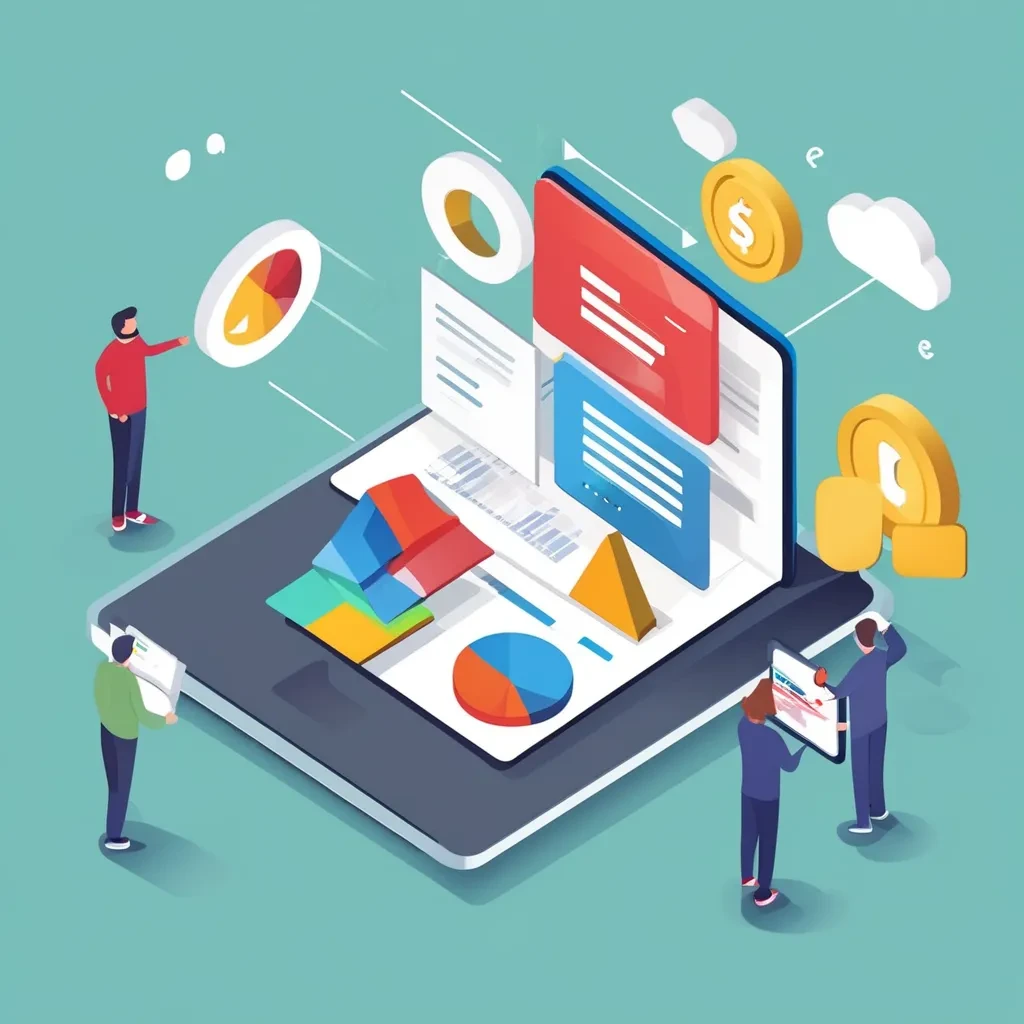

In [2]:
from IPython.display import Image, display
image_path = "/Users/marthaavilas/Documents/FORMATION DATA ANALYTICS/preview.png"
display(Image(filename=image_path))

# Introduction #


<p style="font-size:16px;">  Bienvenue dans ce projet final d’analyse de données intitulé "Prédiction du Comportement Client et Analyse de l’Efficacité des Campagnes Marketing avec l’IA". Ce projet a pour ambition de démontrer comment l’analyse de données et les techniques d’apprentissage automatique peuvent transformer les stratégies marketing d’une entreprise, en maximisant les taux de conversion et en optimisant l’utilisation des ressources.

### Contexte et motivation

<p style="font-size:16px;">  Dans un environnement commercial de plus en plus compétitif, les entreprises doivent non seulement comprendre leurs clients, mais aussi anticiper leurs comportements pour concevoir des campagnes marketing efficaces. En s’appuyant sur des données historiques des campagnes marketing, ce projet vise à identifier les facteurs déterminants de la conversion client et à prédire quels prospects ont le plus fort potentiel de conversion.

### Objectifs du projet

<p style="font-size:16px;">  Segmentation améliorée des clients : Identifier des groupes de clients ayant des comportements similaires pour des campagnes plus ciblées.

<p style="font-size:16px;"> Optimisation de l’efficacité des campagnes marketing : Maximiser les taux de conversion tout en minimisant les coûts opérationnels.

<p style="font-size:16px;"> Utilisation de l’intelligence artificielle pour la prédiction : Construire un modèle prédictif basé sur la régression logistique afin d’identifier les prospects les plus susceptibles de répondre positivement à une campagne spécifique.

### Problématique

### Le projet se concentre sur les questions suivantes :

<p style="font-size:16px;">  Quels sont les facteurs qui influencent le plus la conversion dans une campagne marketing ?

<p style="font-size:16px;">  Comment peut-on prédire avec précision quels clients sont les plus susceptibles de convertir ?

### Méthodologie

<p style="font-size:16px;"> Pour répondre à ces questions, nous avons suivi un pipeline analytique structuré :

<p style="font-size:16px;"> Exploration et préparation des données : Nettoyage, transformation et analyse exploratoire du dataset.

<p style="font-size:16px;"> Modélisation prédictive : Mise en place d’un modèle de régression logistique pour la prédiction du comportement client.

<p style="font-size:16px;"> Analyse des résultats : Interprétation des facteurs influençant la conversion à travers les coefficients du modèle.

<p style="font-size:16px;"> Évaluation de la performance du modèle : Utilisation de métriques comme la précision, le rappel et le F1-score pour évaluer l’efficacité du modèle.

### Impact attendu

<p style="font-size:16px;"> Grâce à ce projet, une entreprise pourra :

<p style="font-size:16px;"> Identifier les clients ayant le plus fort potentiel de conversion.

<p style="font-size:16px;"> Réduire les coûts en concentrant les efforts marketing sur les segments les plus prometteurs.

<p style="font-size:16px;"> Améliorer la performance globale de ses campagnes marketing grâce à des prédictions fiables.

<p style="font-size:16px;"> Ce projet vous guidera à travers les différentes étapes, depuis la préparation des données jusqu’à l’interprétation des résultats, en mettant en avant l’utilisation de l’apprentissage automatique comme levier stratégique pour une prise de décision éclairée. ###

## Étape 1 : Chargement des données, exploration et nettoyage des données 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import StandardScaler



In [2]:
data = pd.read_csv("/Users/marthaavilas/Documents/FORMATION DATA ANALYTICS/PROJET FINAL BORRADOR/ccampagne_marketing_fr (1).csv")
                   

In [3]:
data.info()  #Affiche les colonnes, les lignes , les valeurs nulls et les types de lignes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8005 entries, 0 to 8004
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IdentifiantClient       8005 non-null   int64  
 1   Âge                     8005 non-null   int64  
 2   Sexe                    8005 non-null   object 
 3   Revenu                  7979 non-null   float64
 4   CanalCampagne           8005 non-null   object 
 5   TypeCampagne            8005 non-null   object 
 6   DépensesPublicitaires   8005 non-null   float64
 7   TauxDeClics             8005 non-null   float64
 8   TauxDeConversion        8005 non-null   float64
 9   VisitesSiteWeb          8005 non-null   int64  
 10  PagesParVisite          8005 non-null   float64
 11  TempsSurSite            7984 non-null   float64
 12  PartagesSociaux         8005 non-null   int64  
 13  OuverturesEmail         8005 non-null   int64  
 14  ClicsEmail              8005 non-null   

## La fonction info() nous fournit un résumé général du dataset, incluant :

 **Nombre de lignes (entries) :** Indique qu'il y a un total de 8005 entrées, ce qui signifie que nous disposons de données sur 8000 enregistrements de clients ou d'interactions.

**Nombre de colonnes :**  Il y a 20 colonnes dans le dataset, chacune représentant une caractéristique spécifique de chaque client ou interaction.

**Revenu :** 7979 valeurs non nulles sur 8010, soit 26 valeurs manquantes.

**TempsSurSite :** 7984 valeurs non nulles sur 8010, soit 21 valeurs manquantes.

**Dtype :** Montre le type de données dans chaque colonne.

**int64 :** 9 colonnes int64. Représente des données numériques entières.

**float64 :** 6 colonnes float64. Représente des données numériques décimales.

**object :** 5 colonnes object.  Représente des données catégorielles ou textuelles (comme Sexe ou TypeCampagne).

Ce résumé est utile pour nous assurer qu'il n'y a pas de problèmes avec les types de données et que nous pouvons réaliser l’analyse sans interruptions.

In [8]:
# Vérifier les valeurs nulles
print(data.isnull().sum())

IdentifiantClient          0
Âge                        0
Sexe                       0
Revenu                    26
CanalCampagne              0
TypeCampagne               0
DépensesPublicitaires      0
TauxDeClics                0
TauxDeConversion           0
VisitesSiteWeb             0
PagesParVisite             0
TempsSurSite              21
PartagesSociaux            0
OuverturesEmail            0
ClicsEmail                 0
AchatsPrécédents           0
PointsFidélité             0
PlateformePublicitaire     0
OutilPublicitaire          0
Conversion                 0
dtype: int64


<p style="font-size:16px;">Pour les colonnes contenant des valeurs nulles (Revenu et TempsSurSite), nous allons appliquer un traitement de nettoyage :

<p style="font-size:16px;">Analyse de la Colonne Revenu :

<p style="font-size:16px;">Remplir avec la médiane : Comme le revenu peut avoir une distribution asymétrique (souvent avec des valeurs extrêmes), la médiane est généralement une meilleure mesure pour représenter une valeur centrale sans être influencée par les valeurs extrêmes.

<p style="font-size:16px;">Analyse de la Colonne TempsSurSite :

<p style="font-size:16px;">Remplir avec la médiane : Ici, la médiane peut également être un bon choix, car le temps passé sur un site est susceptible de varier beaucoup d’un client à l’autre.

In [11]:
# Identifier et afficher les lignes avec des valeurs nulles, limitées aux colonnes concernées
lignes_avec_nulles = data.loc[data[['Revenu', 'TempsSurSite']].isnull().any(axis=1), ['Revenu', 'TempsSurSite']]
print("Lignes avec des valeurs nulles, limitées aux colonnes concernées :")
print(lignes_avec_nulles)

Lignes avec des valeurs nulles, limitées aux colonnes concernées :
        Revenu  TempsSurSite
0          NaN      7.396803
1          NaN      5.352549
2          NaN     13.794901
3          NaN     14.688363
4          NaN     13.993370
5          NaN      7.752831
6          NaN     10.698672
7          NaN      2.987817
8          NaN     14.287421
9          NaN      4.613312
10         NaN      3.294720
11         NaN      1.372299
12         NaN      8.480384
13         NaN     14.252725
14         NaN      2.466030
15         NaN      2.252039
16         NaN      4.452666
17         NaN     10.148211
18         NaN      8.443296
19         NaN      1.895001
20         NaN      6.913354
30     72494.0           NaN
31    107973.0           NaN
32     43958.0           NaN
33    109779.0           NaN
34    127713.0           NaN
35    127960.0           NaN
36    114520.0           NaN
37    122478.0           NaN
38    149203.0           NaN
39    141835.0           NaN
40   

In [13]:
# Remplir les valeurs nulles pour 'Revenu' et 'TempsSurSite' avec la médiane
data['Revenu'] = data['Revenu'].fillna(data['Revenu'].median())
data['TempsSurSite'] = data['TempsSurSite'].fillna(data['TempsSurSite'].median())

In [15]:
# Afficher les lignes où les valeurs nulles ont été remplacées
# On sélectionne uniquement les lignes avec des valeurs nulles initialement, 
#pour voir les valeurs remplacées

lignes_remplacees = data.loc[lignes_avec_nulles.index, ['Revenu', 'TempsSurSite']]

print("Lignes avec des valeurs nulles remplacées par la médiane :")
print(lignes_remplacees)

Lignes avec des valeurs nulles remplacées par la médiane :
        Revenu  TempsSurSite
0      84928.0      7.396803
1      84928.0      5.352549
2      84928.0     13.794901
3      84928.0     14.688363
4      84928.0     13.993370
5      84928.0      7.752831
6      84928.0     10.698672
7      84928.0      2.987817
8      84928.0     14.287421
9      84928.0      4.613312
10     84928.0      3.294720
11     84928.0      1.372299
12     84928.0      8.480384
13     84928.0     14.252725
14     84928.0      2.466030
15     84928.0      2.252039
16     84928.0      4.452666
17     84928.0     10.148211
18     84928.0      8.443296
19     84928.0      1.895001
20     84928.0      6.913354
30     72494.0      7.679776
31    107973.0      7.679776
32     43958.0      7.679776
33    109779.0      7.679776
34    127713.0      7.679776
35    127960.0      7.679776
36    114520.0      7.679776
37    122478.0      7.679776
38    149203.0      7.679776
39    141835.0      7.679776
40     57538.

In [16]:
# Vérifier s'il reste des valeurs nulles
print(data.isnull().sum())


IdentifiantClient         0
Âge                       0
Sexe                      0
Revenu                    0
CanalCampagne             0
TypeCampagne              0
DépensesPublicitaires     0
TauxDeClics               0
TauxDeConversion          0
VisitesSiteWeb            0
PagesParVisite            0
TempsSurSite              0
PartagesSociaux           0
OuverturesEmail           0
ClicsEmail                0
AchatsPrécédents          0
PointsFidélité            0
PlateformePublicitaire    0
OutilPublicitaire         0
Conversion                0
dtype: int64


Identifier et Gérer les Doublons

In [20]:
# Vérifier et supprimer les doublons
print("Doublons avant nettoyage :", data.duplicated().sum())


Doublons avant nettoyage : 5


In [22]:
data.drop_duplicates(inplace=True)
print("Doublons après nettoyage :", data.duplicated().sum())


Doublons après nettoyage : 0


In [24]:
# Affichage des statistiques et détection d'eventuelles valeurs aberrantes

print('Info statistique des data')
data.describe().round(2)

Info statistique des data


,IdentifiantClient,Âge,Revenu,DépensesPublicitaires,TauxDeClics,TauxDeConversion,VisitesSiteWeb,PagesParVisite,TempsSurSite,PartagesSociaux,OuverturesEmail,ClicsEmail,AchatsPrécédents,PointsFidélité,Conversion
count,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.0,8000.00,8000.00,8000.00,8000.00,8000.00
mean,11999.50,43.63,84679.09,5132.17,0.15,0.10,24.75,5.55,7.73,49.8,9.48,4.47,4.49,2485.22,0.88
std,2309.55,14.90,37522.93,4520.91,0.08,0.05,14.31,2.61,4.22,28.9,5.71,2.86,2.89,1432.79,0.33
min,8000.00,18.00,20014.00,100.05,0.01,0.01,0.00,1.00,0.50,0.0,0.00,0.00,0.00,-500.00,0.00
25%,9999.75,31.00,51955.75,2526.16,0.08,0.06,13.00,3.30,4.08,25.0,5.00,2.00,2.00,1245.00,1.00
50%,11999.50,43.00,84928.00,5018.91,0.15,0.10,25.00,5.53,7.68,50.0,9.00,4.00,4.00,2490.00,1.00
75%,13999.25,56.00,116768.25,7424.31,0.23,0.15,37.00,7.84,11.47,75.0,14.00,7.00,7.00,3699.25,1.00
max,15999.00,69.00,149986.00,100000.00,0.30,0.20,49.00,10.00,15.00,99.0,19.00,9.00,9.00,4999.00,1.00


## Résumé des Statistiques Descriptives des Données

**Âge :** Moyenne de 43 ans, avec une répartition entre 18 et 69 ans. La variation standard de 15 ans indique une diversité dans les groupes d'âge des clients.

**Revenu :** Revenu moyen de 84 679 € avec un écart-type de 37 523 €, ce qui montre une grande disparité dans les revenus des clients. Le revenu minimal (20 014 €) et maximal (149 986 €) suggèrent la présence de clients issus de classes socio-économiques variées, mais sans valeur manifestement aberrante.

**Dépenses Publicitaires :** La moyenne est de 5 132 €, avec un écart-type élevé (4 521 €), indiquant des investissements publicitaires très variables. La valeur maximale (100 000 €) semble être un point aberrant.

**Taux de Clics :** Moyenne de 0,15 avec un écart-type de 0,08, suggérant une performance assez homogène. Aucune valeur aberrante apparente.

**Taux de Conversion :** Moyenne de 0,10 avec un écart-type de 0,05, suggérant une performance assez homogène. Aucune valeur aberrante apparente.

**Temps sur Site :** Moyenne de 7,73 minutes, avec une large gamme de valeurs entre 0,5 et 15 minutes. Certaines valeurs très faibles (0,5) ou très élevées (15) peuvent indiquer des comportements extrêmes d’engagement client et méritent un examen plus approfondi.

**Points de Fidélité :** Moyenne de 2 485 points, avec un écart-type de 1 433 points. Des valeurs comme -500 points montrent la présence de données aberrantes nécessitant un nettoyage.

**Score de Satisfaction et Score d’Engagement :** Moyenne de 5,5 pour l’engagement et de 5,54 pour la satisfaction, avec une échelle qui va de 1 à 10.

**Fréquence d’Achat :** Moyenne de 5 fois par an, ce qui montre un taux d’achat modéré. Les fréquences d’achat de 0 (aucun achat) et 10 (très fréquents) montrent une variation importante.

**Conversion :** Avec une moyenne de 0,88, ce taux montre que la plupart des clients ciblés par les campagnes sont convertis. Les valeurs de conversion semblent cohérentes, sans outliers évidents, car elles sont binaires (0 ou 1).

<p style="font-size:16px;">Conclusion Préliminaire

<p style="font-size:16px;">Ces statistiques descriptives donnent un aperçu initial des variables du dataset. Elles montrent la présence de quelques valeurs aberrantes potentielles (par exemple, des points de fidélité négatifs et des dépenses publicitaires très élevées), que nous traiterons lors du nettoyage des données. En nettoyant ces valeurs, nous visons à obtenir une base de données plus fiable pour l’analyse approfondie, et pour le modèle prédictif final qui identifiera les facteurs influençant la conversion dans une campagne marketing.

## Visualisation de la distribution de chaque variable quantitative

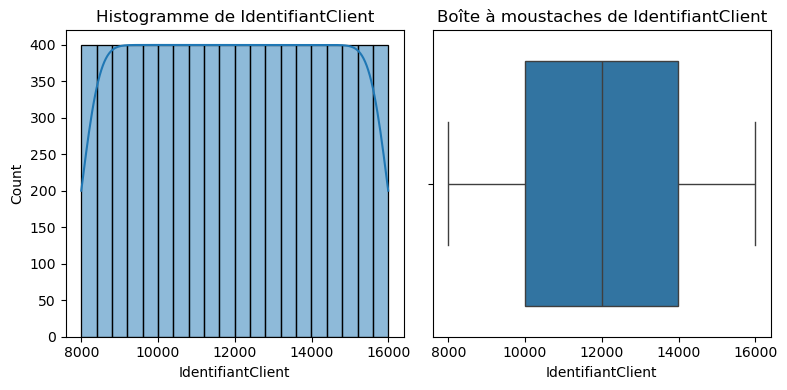

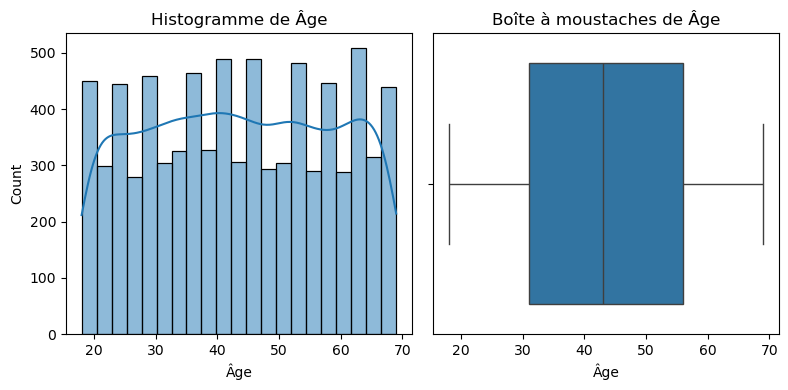

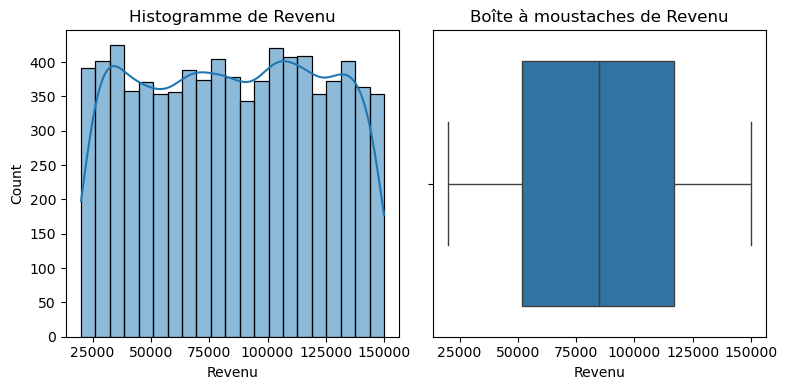

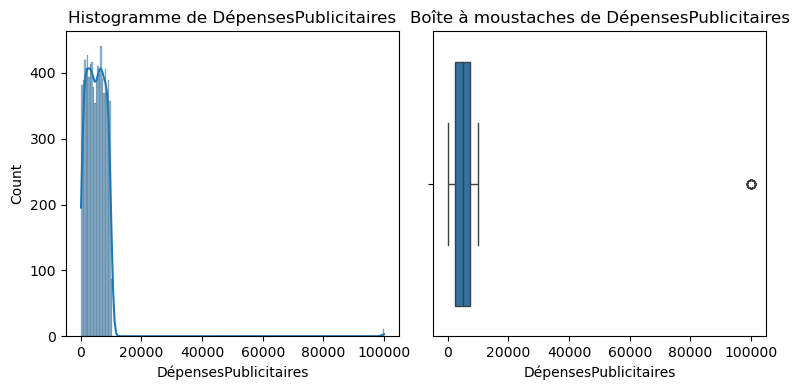

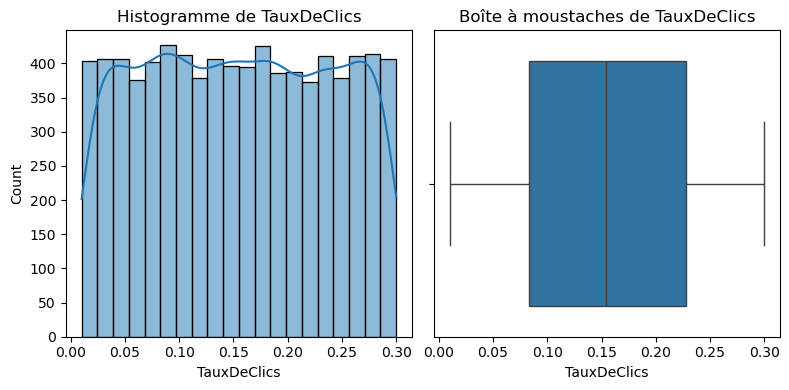

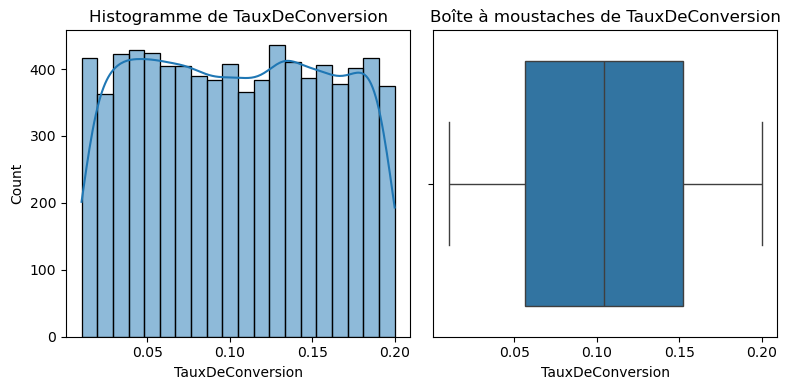

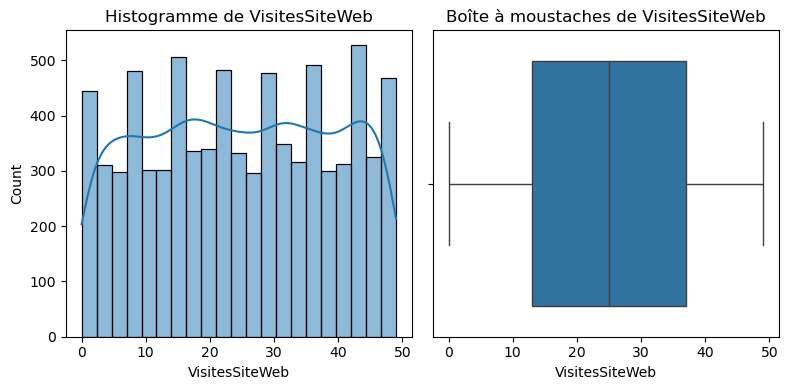

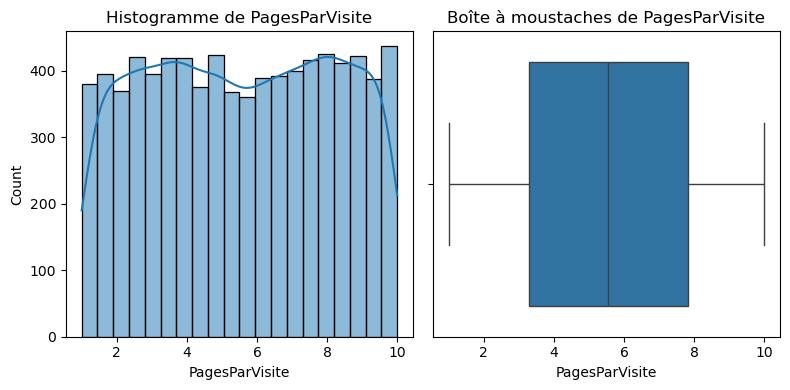

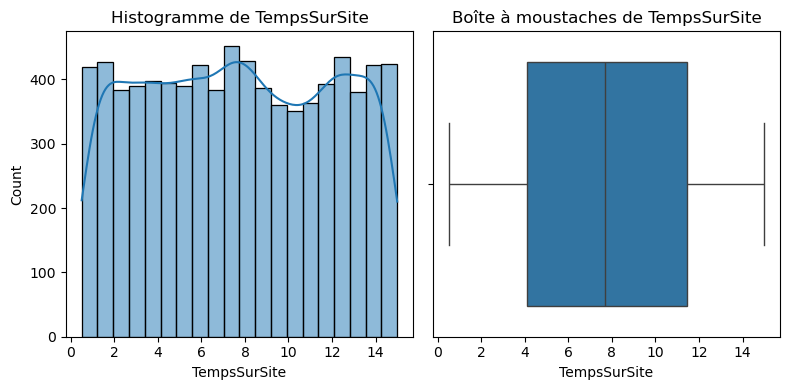

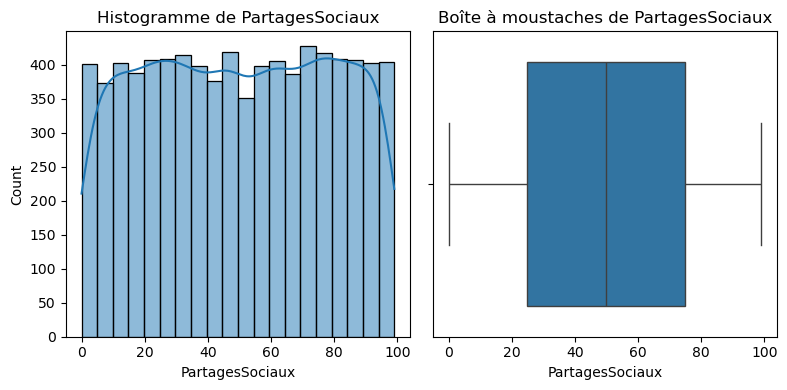

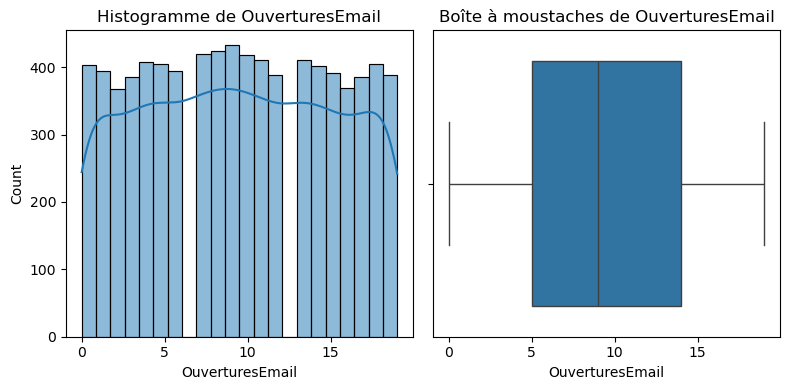

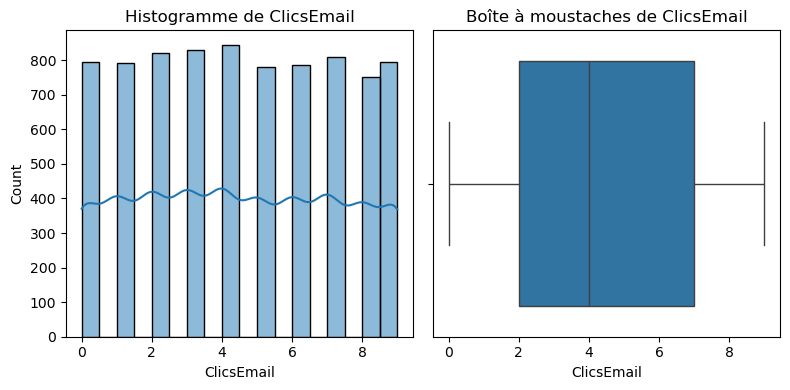

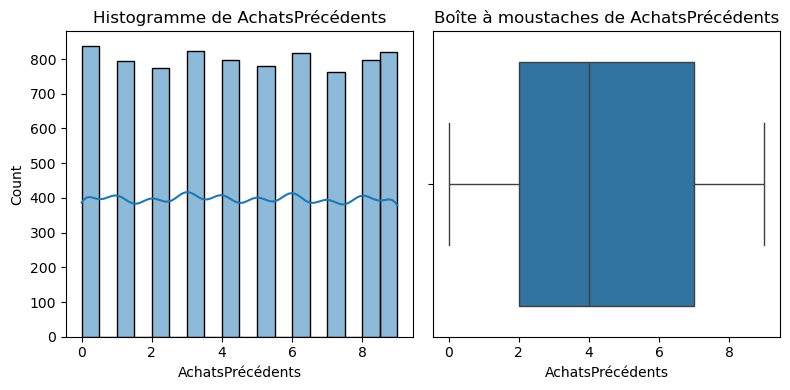

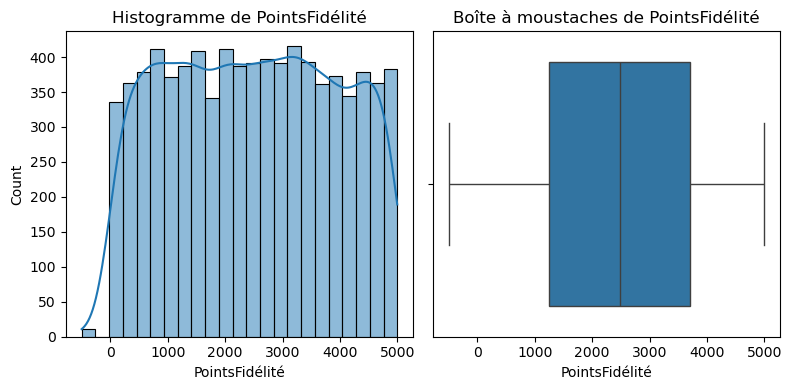

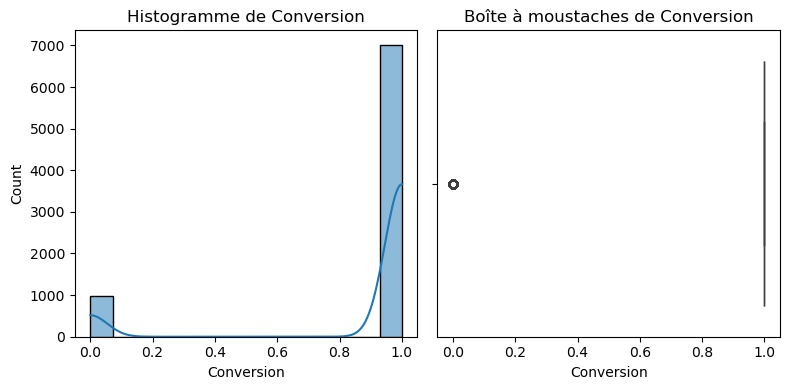

In [28]:
for col in data.select_dtypes(include=[ 'float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    
    # Histogramme
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogramme de {col}')
    
    # Boîte à moustaches pour identifier les valeurs aberrantes
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boîte à moustaches de {col}')
        
    
    plt.tight_layout()
    plt.show()

## Analyse concise des valeurs aberrantes identifiées dans certaines variables clés de notre projet :

**DépensesPublicitaires :** La distribution des dépenses publicitaires présente de fortes disparités, avec une concentration des valeurs autour des montants plus bas et des valeurs aberrantes atteignant des niveaux très élevés.

**PointsFidélité :** Le graphique montre une distribution relativement homogène des points de fidélité, avec quelques valeurs extrêmes faibles.



## Visualisation de la distribution de chaque variable catégorielle 

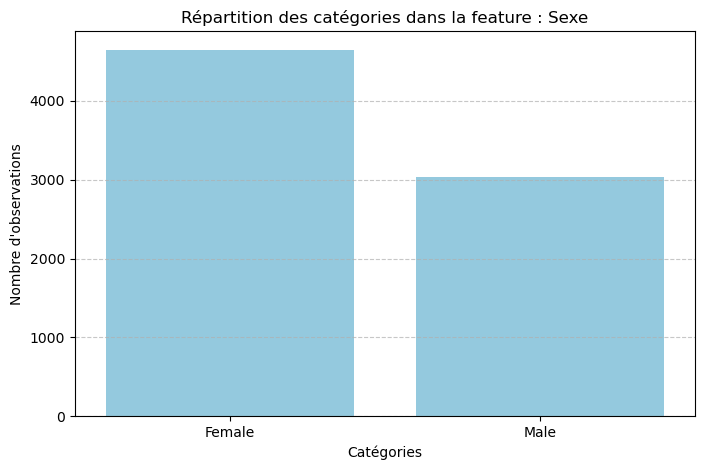

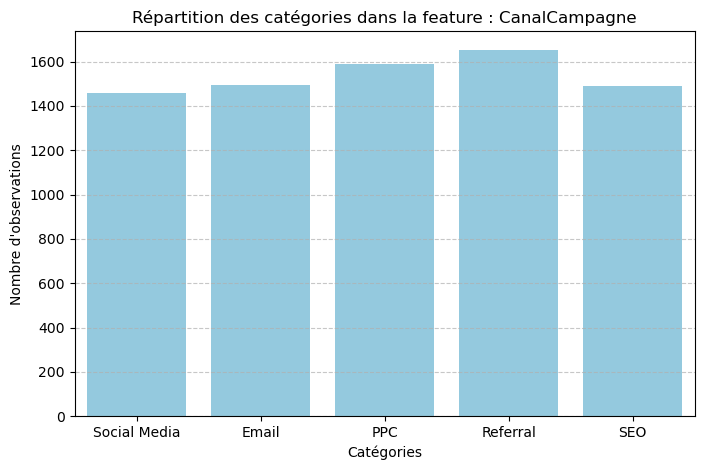

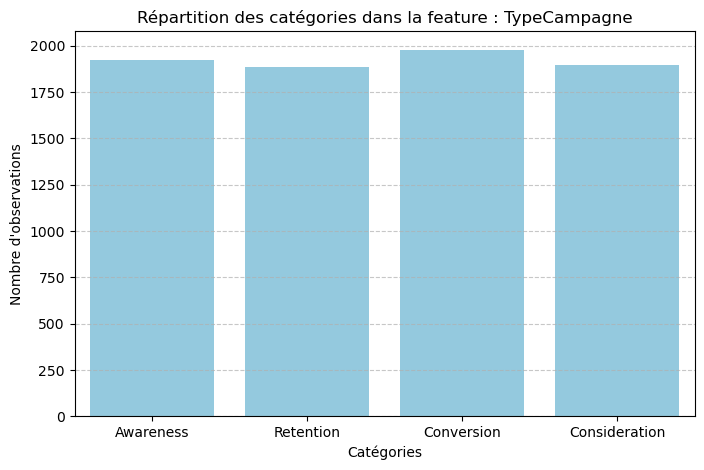

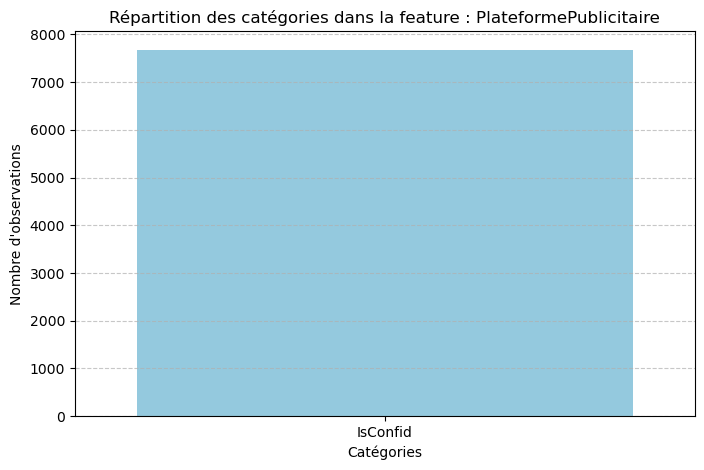

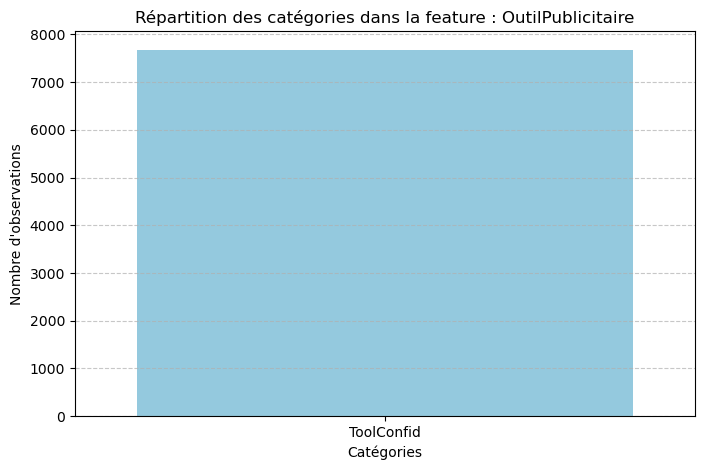

In [141]:
for col in columns_to_encode:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=col, color="skyblue")
    plt.title(f"Répartition des catégories dans la feature : {col}")
    plt.xlabel("Catégories")
    plt.ylabel("Nombre d'observations")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


## Nettoyage des valeurs aberrantes en Dépenses publicitaires et Points de fidélité

In [35]:
# Tri des data par ordre décroissant par rapport à la colonne

data.sort_values(by =["DépensesPublicitaires"], ascending=False).round(2)

,IdentifiantClient,Âge,Sexe,Revenu,CanalCampagne,TypeCampagne,DépensesPublicitaires,TauxDeClics,TauxDeConversion,VisitesSiteWeb,PagesParVisite,TempsSurSite,PartagesSociaux,OuverturesEmail,ClicsEmail,AchatsPrécédents,PointsFidélité,PlateformePublicitaire,OutilPublicitaire,Conversion
101,8101,18,Female,144925.0,Email,Consideration,100000.00,0.11,0.04,36,9.04,5.63,21,0,9,6,4525,IsConfid,ToolConfid,1
110,8110,28,Female,32938.0,PPC,Consideration,100000.00,0.13,0.04,14,6.90,7.18,31,19,3,5,3426,IsConfid,ToolConfid,1
107,8107,61,Male,22669.0,PPC,Retention,100000.00,0.16,0.19,38,5.60,8.41,88,13,4,6,3502,IsConfid,ToolConfid,1
106,8106,18,Male,116102.0,Referral,Retention,100000.00,0.16,0.13,41,2.68,9.67,20,14,9,8,4403,IsConfid,ToolConfid,1
105,8105,41,Male,83594.0,Social Media,Consideration,100000.00,0.26,0.09,44,4.41,1.08,36,11,6,5,360,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4660,12660,37,Female,121024.0,Social Media,Conversion,103.96,0.25,0.04,15,6.58,3.70,0,15,5,4,4104,IsConfid,ToolConfid,1
1849,9849,22,Female,44260.0,PPC,Consideration,103.41,0.21,0.08,14,9.29,2.03,4,5,1,7,2676,IsConfid,ToolConfid,1
6786,14786,48,Female,44490.0,Referral,Consideration,100.97,0.14,0.08,2,1.46,8.22,16,0,9,9,635,IsConfid,ToolConfid,0
3492,11492,64,Female,36756.0,PPC,Awareness,100.67,0.09,0.06,12,2.27,1.65,49,7,2,6,3605,IsConfid,ToolConfid,0


In [37]:
data.sort_values(by =["PointsFidélité"], ascending=False).round(2)

,IdentifiantClient,Âge,Sexe,Revenu,CanalCampagne,TypeCampagne,DépensesPublicitaires,TauxDeClics,TauxDeConversion,VisitesSiteWeb,PagesParVisite,TempsSurSite,PartagesSociaux,OuverturesEmail,ClicsEmail,AchatsPrécédents,PointsFidélité,PlateformePublicitaire,OutilPublicitaire,Conversion
6445,14445,40,Male,55785.0,Referral,Consideration,2868.11,0.08,0.15,9,3.58,0.75,31,14,8,5,4999,IsConfid,ToolConfid,1
1689,9689,52,Female,122428.0,Referral,Retention,6291.88,0.22,0.11,3,6.11,6.86,31,3,2,0,4999,IsConfid,ToolConfid,1
4346,12346,27,Female,109758.0,SEO,Conversion,9883.33,0.11,0.11,24,5.23,1.03,18,3,1,1,4999,IsConfid,ToolConfid,1
6549,14549,59,Female,22484.0,Referral,Awareness,7148.51,0.13,0.01,4,5.01,8.70,83,6,9,6,4998,IsConfid,ToolConfid,1
7911,15911,35,Female,97090.0,Social Media,Awareness,5092.71,0.12,0.14,34,9.02,10.54,44,6,7,0,4997,IsConfid,ToolConfid,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,8126,51,Female,40710.0,Email,Conversion,5506.02,0.26,0.16,44,2.62,3.68,4,9,9,4,-500,IsConfid,ToolConfid,1
127,8127,50,Male,105488.0,Referral,Consideration,5849.41,0.04,0.04,0,9.05,8.22,58,2,4,6,-500,IsConfid,ToolConfid,1
128,8128,65,Male,33448.0,SEO,Awareness,8018.60,0.07,0.06,24,5.82,2.46,69,7,8,3,-500,IsConfid,ToolConfid,1
129,8129,40,Male,35198.0,Social Media,Consideration,5335.55,0.29,0.14,33,7.43,14.29,21,19,7,9,-500,IsConfid,ToolConfid,1


In [39]:
# Fonction pour supprimer les valeurs aberrantes dans certaines colonnes
def supprimer_valeurs_aberrantes(df, colonnes):
    
    # Créer une copie du DataFrame pour éviter de modifier l'original.
    # Cette étape est importante pour ne pas altérer les données brutes et permet de travailler en sécurité.
    df_copie = df.copy()

    # Boucle sur chaque colonne spécifiée dans la liste `colonnes`.
    for colonne in colonnes:
        
        # Définir les bornes inférieure et supérieure pour filtrer les valeurs aberrantes.
        # Ici, nous utilisons les percentiles 1% et 99%, car ils excluent les 1% des valeurs
        # les plus extrêmes aux deux extrémités (haut et bas) de la distribution des données.
        # Cela permet de réduire l'impact des valeurs très extrêmes sans perdre une grande quantité de données.
        borne_inferieure = df_copie[colonne].quantile(0.01)
        borne_superieure = df_copie[colonne].quantile(0.99)
        
        # Afficher les bornes pour chaque colonne pour s'assurer que les valeurs choisies sont appropriées.
        # Ceci aide à comprendre quels sont les seuils utilisés pour détecter les valeurs aberrantes.
        print(f"Borne inférieure pour {colonne} : {borne_inferieure}")
        print(f"Borne supérieure pour {colonne} : {borne_superieure}")
        
        # Filtrer les données pour conserver uniquement les valeurs qui se trouvent dans l'intervalle défini par les bornes.
        # Cela exclut toutes les valeurs situées en dehors des percentiles 1% et 99%, considérées comme valeurs aberrantes.
        df_copie = df_copie[(df_copie[colonne] >= borne_inferieure) & (df_copie[colonne] <= borne_superieure)]
    
    # Retourner le DataFrame filtré sans les valeurs aberrantes.
    return df_copie

# Liste des colonnes pour lesquelles nous souhaitons supprimer les valeurs aberrantes.
# Nous avons identifié les colonnes "DépensesPublicitaires" et "PointsFidélité" comme ayant des valeurs potentiellement aberrantes
# après une analyse initiale des données, incluant des boîtes à moustaches et des statistiques descriptives.
colonnes_avec_aberrants = ["DépensesPublicitaires", "PointsFidélité"]

# Appliquer la fonction pour supprimer les valeurs aberrantes dans les colonnes sélectionnées et mettre à jour le DataFrame 'data'.
data = supprimer_valeurs_aberrantes(data, colonnes_avec_aberrants)


Borne inférieure pour DépensesPublicitaires : 208.85654268817194
Borne supérieure pour DépensesPublicitaires : 9917.99204331438
Borne inférieure pour PointsFidélité : 46.78
Borne supérieure pour PointsFidélité : 4944.0


<p style="font-size:16px;">Explication du nettoyage détaillée :

<p style="font-size:16px;">Création d'une copie des données : La fonction commence par créer une copie du DataFrame df. Cela permet de travailler sur cette copie sans modifier l'original, pour préserver les données brutes.

<p style="font-size:16px;">Utilisation des percentiles 1% et 99% : Nous avons choisi les percentiles 1% et 99% comme bornes pour exclure les valeurs extrêmes. Cela signifie que nous conservons 98% des données qui sont dans un intervalle "normal", et écartons seulement les 1% des valeurs les plus basses et les plus hautes. Ce choix est courant pour traiter les valeurs aberrantes, car il permet de garder l'essentiel des données tout en supprimant les valeurs extrêmes.

<p style="font-size:16px;">Affichage des bornes : Pour chaque colonne, nous calculons et affichons la borne inférieure et la borne supérieure. Cette étape aide à vérifier que les seuils définis sont cohérents avec l'analyse et que les valeurs aberrantes identifiées sont bien celles que nous voulons supprimer.

<p style="font-size:16px;">Filtrage des valeurs aberrantes : La fonction conserve uniquement les valeurs qui se trouvent dans l'intervalle défini par les bornes. Toutes les valeurs en dehors de ces seuils sont exclues, ce qui permet de nettoyer les données de manière ciblée.

<p style="font-size:16px;">Application de la fonction : Enfin, nous appliquons cette fonction aux colonnes sélectionnées (DépensesPublicitaires et PointsFidélité), que nous avons identifiées comme ayant des valeurs aberrantes, d'après notre analyse exploratoire.

## Analyse succincte des statistiques descriptives post-nettoyage :

In [43]:
data.describe().round(1)

,IdentifiantClient,Âge,Revenu,DépensesPublicitaires,TauxDeClics,TauxDeConversion,VisitesSiteWeb,PagesParVisite,TempsSurSite,PartagesSociaux,OuverturesEmail,ClicsEmail,AchatsPrécédents,PointsFidélité,Conversion
count,7683.0,7683.0,7683.0,7683.0,7683.0,7683.0,7683.0,7683.0,7683.0,7683.0,7683.0,7683.0,7683.0,7683.0,7683.0
mean,12003.7,43.7,84616.2,5014.0,0.2,0.1,24.8,5.5,7.7,50.0,9.5,4.5,4.5,2487.1,0.9
std,2304.1,14.9,37540.9,2786.1,0.1,0.1,14.3,2.6,4.2,28.9,5.7,2.9,2.9,1402.5,0.3
min,8000.0,18.0,20014.0,208.9,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,48.0,0.0
25%,10011.5,31.0,51954.5,2600.8,0.1,0.1,13.0,3.3,4.1,25.0,5.0,2.0,2.0,1277.0,1.0
50%,11998.0,43.0,84912.0,5029.9,0.2,0.1,25.0,5.5,7.7,50.0,9.0,4.0,4.0,2496.0,1.0
75%,13998.5,57.0,116779.5,7382.8,0.2,0.2,37.0,7.8,11.5,75.0,14.0,7.0,7.0,3676.0,1.0
max,15999.0,69.0,149986.0,9918.0,0.3,0.2,49.0,10.0,15.0,99.0,19.0,9.0,9.0,4944.0,1.0


**DépensesPublicitaires :** La moyenne est de 5014, ce qui indique que les dépenses publicitaires sont modérées après la suppression des valeurs extrêmes.
L'écart type de 2786 montre une certaine variation, mais contrôlée, suggérant que la majorité des valeurs se situent dans une fourchette raisonnable.

Les valeurs minimales et maximales (entre 200 et environ 9900) confirment l'élimination des dépenses publicitaires excessivement élevées.

**PointsFidélité :** La moyenne est de 2487, indiquant que les clients ont un bon niveau de fidélité en général. L'écart type de 1402 montre une dispersion assez large, probablement due à la diversité des comportements de fidélité. Les valeurs vont de 48 à environ 4944, ce qui est plus représentatif d’une gamme réaliste de points de fidélité.


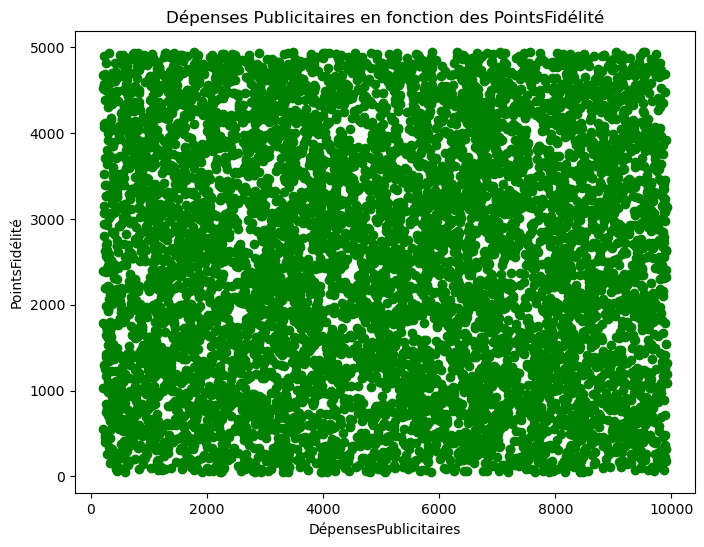

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(data['DépensesPublicitaires'], data['PointsFidélité'],color='green')
plt.title('Dépenses Publicitaires en fonction des PointsFidélité')
plt.xlabel('DépensesPublicitaires')
plt.ylabel('PointsFidélité')
plt.show()

<p style="font-size:16px;">Dépenses Publicitaires et Points de Fidélité : Le graphique montre la relation entre les Dépenses Publicitaires et les Points de Fidélité après le nettoyage des valeurs aberrantes.

<p style="font-size:16px;">Répartition uniforme : Les données sont réparties de manière assez uniforme dans la plage de valeurs observées, sans concentration particulière dans une zone spécifique.

<p style="font-size:16px;">Absence de forte corrélation visuelle : On ne remarque pas de tendance claire indiquant que des Dépenses Publicitaires plus élevées augmenteraient ou diminueraient les Points de Fidélité de manière significative.

<p style="font-size:16px;">Données nettoyées : Les valeurs extrêmes qui auraient pu perturber l'analyse ont été supprimées, permettant une meilleure vue d’ensemble des données "normales" de l'échantillon.

## Analyse de la matrice de correlation avec la variante 'Conversion'

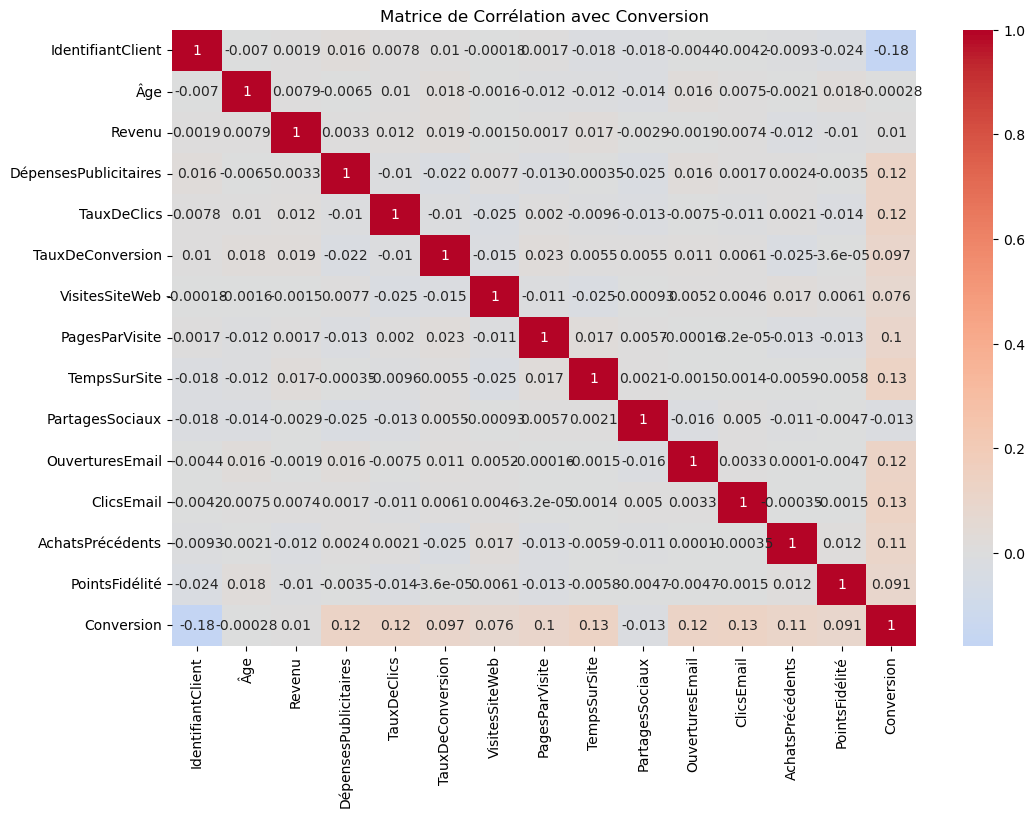

Conversion               1.000000
TempsSurSite             0.132476
ClicsEmail               0.129959
OuverturesEmail          0.123971
DépensesPublicitaires    0.120759
TauxDeClics              0.119517
AchatsPrécédents         0.111848
PagesParVisite           0.101064
TauxDeConversion         0.097005
PointsFidélité           0.091105
VisitesSiteWeb           0.075939
Revenu                   0.010037
Âge                     -0.000283
PartagesSociaux         -0.012771
IdentifiantClient       -0.177957
Name: Conversion, dtype: float64


In [50]:
# Sélectionner uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=['number'])

# Calculer la matrice de corrélation uniquement avec les colonnes numériques
correlation_matrix = numeric_data.corr()

# Générer un heatmap pour visualiser la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de Corrélation avec Conversion")
plt.show()

# Afficher uniquement la corrélation avec 'Conversion'
correlation_with_conversion = correlation_matrix['Conversion'].sort_values(ascending=False)
print(correlation_with_conversion)

**TempsSurSite (0.13) :** Ce facteur montre une corrélation positive modérée avec la conversion, indiquant que plus le temps passé sur le site est élevé, plus la probabilité de conversion est élevée. Cela peut signifier que les visiteurs qui s’engagent davantage sont plus susceptibles de convertir.

**ClicsEmail (0.13) et OuverturesEmail (0.12) :** La corrélation positive entre ces variables et la conversion indique que les clients qui interagissent avec les emails (les ouvrent ou cliquent dessus) montrent une probabilité accrue de conversion. Cela souligne l'importance d'une campagne emailing bien ciblée.

**DépensesPublicitaires (0.12) :** Une légère corrélation positive avec la conversion suggère que des investissements en publicité peuvent encourager les conversions, mais l’effet reste modéré.

**TauxDeClics (0.12) :** Un taux de clics plus élevé est associé à une probabilité accrue de conversion, montrant que l’engagement avec le contenu (comme les publicités) joue un rôle.

**AchatsPrécédents (0.11) :** Les clients ayant réalisé des achats dans le passé sont légèrement plus susceptibles de convertir à nouveau, ce qui montre l’importance de la fidélisation.

**PointsFidélité (0.09) :** Les points de fidélité ont un impact positif léger, indiquant que le programme de fidélité peut avoir un effet bénéfique, bien que modéré.

**Revenu (0.01) et Âge (-0.0003) :** Ces variables n’ont pratiquement aucune corrélation avec la conversion, suggérant que ni l’âge ni le revenu ne sont des facteurs significatifs dans le processus de conversion.

**IdentifiantClient (-0.18) :** La corrélation négative ici est due à la nature des données, car l’identifiant n’a pas de lien direct avec la conversion.




## Utilisation du Modèle de classification Regression Logistique 

<p style="font-size:16px;">La régression logistique est un modèle de classification binaire qui permet de prédire la probabilité qu’un événement se produise (dans notre cas, la conversion d’un client, c'est-à-dire si un client répondra positivement ou non à une campagne). Elle est particulièrement adaptée aux problématiques de classification binaire (0 ou 1) comme celle-ci.

## Résultats attendus

<p style="font-size:16px;">En utilisant la régression logistique, nous espérons :

<p style="font-size:16px;">Identifier les facteurs influents : La régression logistique fournit des coefficients pour chaque variable, ce qui nous permet de comprendre l’impact de chaque facteur (ex. : âge, revenu, clics d’email, dépenses publicitaires, etc.) sur la probabilité de conversion. Les variables avec des coefficients élevés (positifs ou négatifs) sont celles qui influencent le plus la conversion.

<p style="font-size:16px;">Prédire la probabilité de conversion : Pour chaque client, le modèle nous donnera une probabilité de conversion. Ainsi, nous pourrons cibler les clients avec une forte probabilité de conversion pour maximiser l’efficacité des campagnes marketing.

## Contribution aux Objectifs et à la Problématique

<p style="font-size:16px;">La régression logistique nous permet de répondre directement à nos questions principales :

<p style="font-size:16px;">Quels sont les facteurs qui influencent le plus la conversion ?

<p style="font-size:16px;">En analysant les coefficients du modèle, nous identifions les variables qui ont le plus d’influence sur la conversion. Cela aide à comprendre les caractéristiques qui rendent les clients plus susceptibles de convertir.

<p style="font-size:16px;">Comment prédire quels clients sont les plus susceptibles de répondre positivement ?

<p style="font-size:16px;">La probabilité de conversion calculée par le modèle nous permet de classer les clients en fonction de leur propension à convertir. Nous pourrons ainsi prioriser les efforts de marketing vers les clients les plus susceptibles de répondre positivement.

<p style="font-size:16px;">En résumé, la régression logistique est un excellent choix pour ce projet car elle permet à la fois de comprendre les facteurs influents et de faire des prédictions ciblées sur les conversions, ce qui est essentiel pour maximiser l’efficacité des campagnes marketing.

In [54]:
data["Conversion"].value_counts()

Conversion
1    6741
0     942
Name: count, dtype: int64

<p style="font-size:16px;"> Avant de passer aux etapes d'entrainement du modele  de régression logistique, j'utilise la fonction value_counts() pour compter les occurences de chaque modalité de la colonne Conversion Autrement dit, ce code me permet de savoir combien de clients sont effectivement on été convertis et combien n'ont au contraire pas été converti. L'execution du code suivant me permet d'apprendre que 942 ne se sont pas convertis en clients,  tandis que 6741 si se sont convertis en clients.

## Etapes d'entrainement du modele de régression logistique

<p style="font-size:16px;">Appliquer OneHotEncoder à vos données
Avant d'entraîner le modèle, il est essentiel d'inclure les variables catégoriques.

<p style="font-size:16px;">Pourquoi inclure OneHotEncoder ? Si les modèles ont été entraînés sans les variables catégoriques, ces résultats sont incomplets. Les catégories ajoutent de l'information précieuse, et leur absence peut biaiser vos coefficients ou vos prédictions.

In [58]:
data.drop(['IdentifiantClient'],axis=1,inplace=True) #Effacer la colonne idclient car puisse causer de bruit au moment de l’entraînement 


In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Colonnes catégoriques à encoder
columns_to_encode = ['Sexe', 'CanalCampagne', 'TypeCampagne', 'PlateformePublicitaire', 'OutilPublicitaire']

# Création du OneHotEncoder
onehotencoder = OneHotEncoder(drop='first', sparse_output=False)

# Utilisation du ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', onehotencoder, columns_to_encode)],remainder='passthrough')

# Ajustement et transformation des données
data_encoded_array = column_transformer.fit_transform(data)

# Récupérer les noms des colonnes encodées
encoded_columns = column_transformer.named_transformers_['cat'].get_feature_names_out(columns_to_encode)
remaining_columns = [col for col in data.columns if col not in columns_to_encode]

# Combiner les noms des colonnes encodées avec les autres colonnes
all_columns = list(encoded_columns) + remaining_columns

# Convertir le tableau numpy en DataFrame
data_encoded = pd.DataFrame(data_encoded_array, columns=all_columns)

# Vérifier les résultats
print(data_encoded.head())



   Sexe_Male  CanalCampagne_PPC  CanalCampagne_Referral  CanalCampagne_SEO  \
0        0.0                0.0                     0.0                0.0   
1        1.0                0.0                     0.0                0.0   
2        0.0                1.0                     0.0                0.0   
3        0.0                1.0                     0.0                0.0   
4        0.0                1.0                     0.0                0.0   

   CanalCampagne_Social Media  TypeCampagne_Consideration  \
0                         1.0                         0.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   TypeCampagne_Conversion  TypeCampagne_Retention   Âge   Revenu  ...  \
0                      0.0                     0.0  56.0  84928.0  ...   
1               

## Conclusion sur la partie d'encodage 
<p style="font-size:16px;">L'encodage des variables catégorielles à l'aide du OneHotEncoder a permis de transformer les colonnes initiales contenant des catégories en des variables binaires exploitables par les algorithmes de machine learning. Cette étape est essentielle car les modèles prédictifs, comme la régression logistique utilisée dans ce projet, nécessitent des données numériques pour effectuer des calculs.

<p style="font-size:16px;">Les variables comme Sexe, CanalCampagne, TypeCampagne, PlateformePublicitaire et OutilPublicitaire ont été converties en plusieurs colonnes binaires représentant chaque catégorie unique.

## Visualisations pertinentes pour mieux comprendre les relations entre les catégories et les colonnes binaires aux taux de conversion

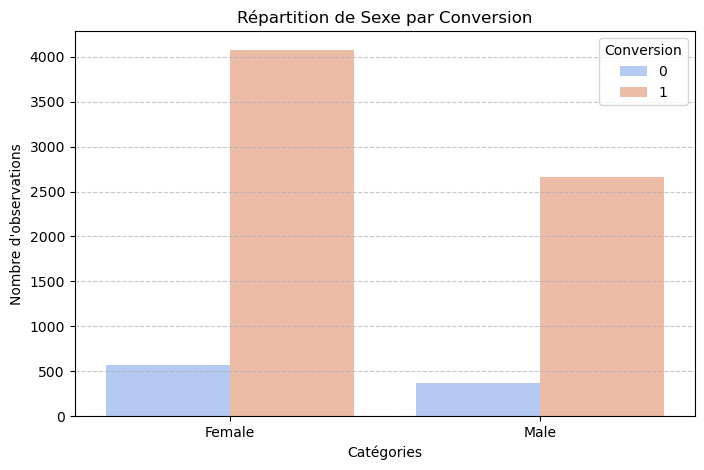

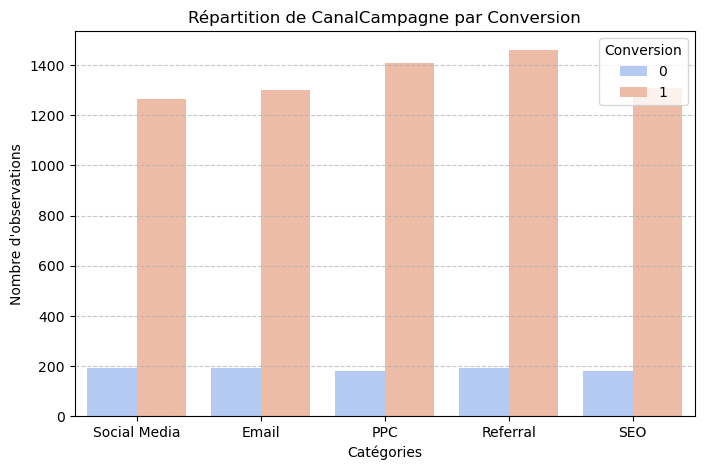

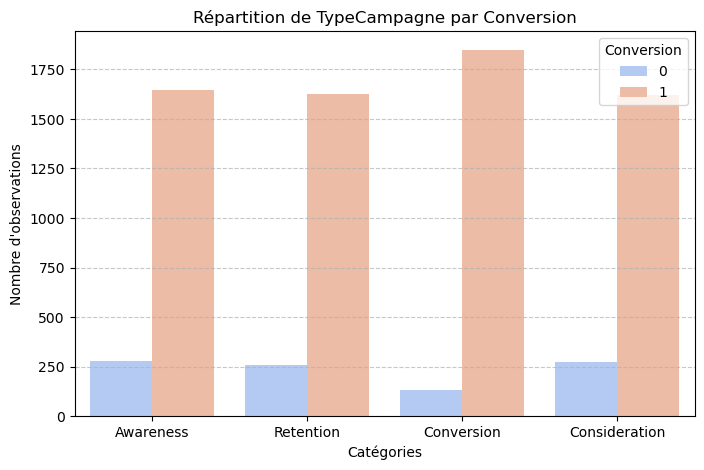

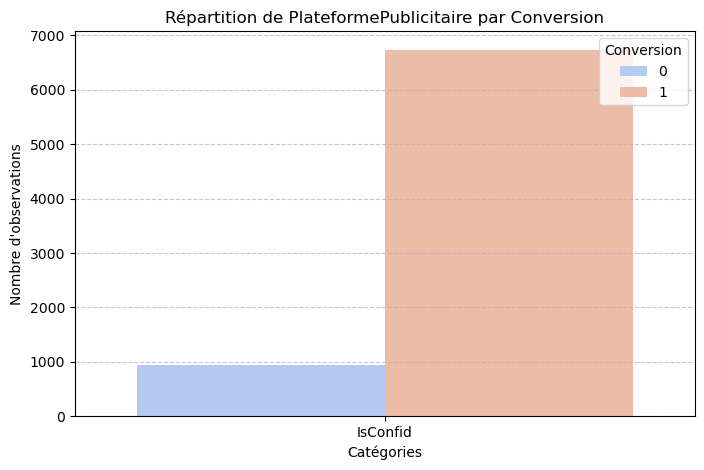

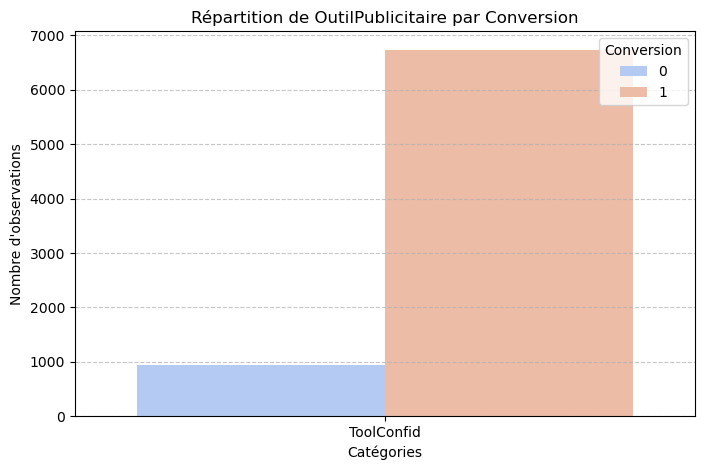

In [64]:
# Afficher la répartition des catégories en fonction de la cible
for col in columns_to_encode:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=col, hue='Conversion', palette='coolwarm')
    plt.title(f"Répartition de {col} par Conversion")
    plt.xlabel("Catégories")
    plt.ylabel("Nombre d'observations")
    plt.legend(title='Conversion', loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

## Entraînement du modele Logistic Regression

### Etape 1: importer les biblioteques neccesaires 

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


### Étape 2 : Préparer les données pour l'entraînement Nous devons séparer les variables indépendantes (features) et la variable dépendante (target). Ici, la variable cible est Conversion, que nous voulons prédire.

In [71]:
# Définir les features (X) et la target (y)
X = data.drop(columns=['Conversion', 'Sexe', 'CanalCampagne', 'TypeCampagne', 'PlateformePublicitaire', 'OutilPublicitaire'])  # Toutes les colonnes sauf Conversion
y = data['Conversion']  # La colonne que nous souhaitons prédire

### Étape 3 : Diviser les données en ensembles d'entraînement et de test Il est essentiel de diviser les données pour évaluer la performance du modèle sur des données qu'il n'a pas vues pendant l'entraînement.

In [88]:
# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
# Définir les variables explicatives (X) et la variable cible (y)

X = data_encoded.iloc[:, :-1]  # Toutes les colonnes sauf la dernière
y = data_encoded.iloc[:, -1]   # La dernière colonne (Conversion)


### Étape 4 : Initialiser et entraîner le modèle de régression logistique. Nous allons maintenant créer une instance de la régression logistique et entraîner le modèle sur les données d'entraînement.

In [93]:
# Normaliser les données (StandardScaler)
scaler = StandardScaler() # Cette ligne crée une instance de StandardScaler. 
#Il est maintenant prêt à être ajusté sur les données.

X_train_scaled = scaler.fit_transform(X_train) #Ajuster le scaler sur les données d'entraînement 
#et transformer les données

#Ajustement (fit) : elle calcule la moyenne et l'écart-type de chaque caractéristique dans 
#les données d'entraînement (X_train)

#Transformation (transform) : elle utilise ces moyennes et écart-types pour normaliser chaque caractéristique,
#en soustrayant la moyenne et en divisant par l'écart-type

X_test_scaled = scaler.transform(X_test)  #transformer les données de test en utilisant le même scaler
#on utilise seulement transform sur les données de test (X_test). Cela signifie que les données
#de test sont transformées en utilisant la moyenne et l'écart-type calculés à partir des données d'entraînement.

#C'est important car on ne veut pas que les données de test influencent la normalisation, 
#pour éviter les biais d'entraînement.


# Initialiser et entraîner le modèle de régression logistique
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

# On initialise la régression logistique avec max_iter=1000 pour s'assurer que 
#le modèle a suffisamment d'itérations pour converger. Si l'on ne fixe pas de random_state, chaque fois que le code est exécuté, 
#ces processus aléatoires produisent des résultats différents. On entraîne ensuite le modèle sur les 
#données normalisées X_train_scaled.

LogisticRegression(max_iter=1000, random_state=42)

<p style="font-size:16px;">Résultat : toutes les caractéristiques de X_train sont maintenant centrées autour de 0 avec un écart-type de 1. Cette transformation rend les données plus compatibles avec les modèles de régression logistique, ce qui améliore souvent la convergence du modèle.

<p style="font-size:16px;">Les modèles de régression logistique (et bien d’autres modèles) fonctionnent mieux avec des données normalisées. Si certaines caractéristiques ont des échelles très différentes, comme par exemple des valeurs de revenus en milliers contre des taux de clics en pourcentage, cela peut rendre la descente de gradient difficile et empêcher le modèle de converger.



### Étape 5 : Prédictions sur l'ensemble de test.

<p style="font-size:16px;"> Une fois le modèle entraîné, nous pouvons l'utiliser pour faire des prédictions sur les données de test

In [97]:
# Prédire sur l'ensemble de test
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

### Étape 6 : Évaluer la performance du modèle

In [100]:
# Calculer la précision du modèle
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Précision du modèle : {accuracy * 100:.2f}%")

Précision du modèle : 90.83%


**<p style="font-size:16px;">Précision du modèle : 90.83%**
<p style="font-size:16px;">Le modèle de régression logistique que nous avons entraîné a atteint une précision de 90,83 %. Cela signifie que sur 100 prédictions effectuées par le modèle, environ 91 sont correctes. En d'autres termes, le modèle peut identifier correctement si un client est susceptible de convertir (répondre positivement à une campagne marketing) avec une grande fiabilité.

<p style="font-size:16px;">Interprétation en lien avec la problématique :

<p style="font-size:16px;">Cette précision de 90,83 % est un indicateur positif de la capacité du modèle à répondre à notre problématique : Quels sont les facteurs qui influencent le plus la conversion dans une campagne marketing ? Comment peut-on prédire quels clients sont les plus susceptibles de répondre positivement à une campagne spécifique ?

<p style="font-size:16px;">Avec cette précision, notre modèle est un bon point de départ pour :

<p style="font-size:16px;">Identifier les facteurs de conversion en analysant les coefficients (ou l’importance des variables) dans le modèle.

<p style="font-size:16px;">Prédire la probabilité de conversion des clients, ce qui peut guider les décisions de ciblage marketing.

<p style="font-size:16px;">La matrice de confusion permet de visualiser la performance du modèle en montrant le nombre de prédictions correctes et incorrectes pour chaque classe (conversion et non-conversion).

### Afficher la matrice de confusion

In [104]:
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
print("Matrice de confusion :")
print(conf_matrix)

Matrice de confusion :
[[  24  129]
 [  12 1372]]


<p style="font-size:16px;">Interprétation de la Matrice de Confusion

<p style="font-size:16px;">Chaque élément de cette matrice représente un groupe de prédictions du modèle, avec les significations suivantes :

**True Negatives (TN) = 24 :** Le modèle a correctement prédit "non-conversion" pour 24 cas. Ces prédictions sont correctes mais faibles en nombre, ce qui indique que la majorité des clients dans l'échantillon test sont réellement convertis.

**False Positives (FP) = 129 :** Le modèle a prédit "conversion" alors qu'il s'agissait en réalité de "non-conversion", donc 129 faux positifs. Ces cas représentent des prédictions incorrectes où le modèle a supposé que le client allait convertir alors qu'il ne l'a pas fait. Un nombre élevé de faux positifs pourrait entraîner des coûts inutiles pour des clients qui ne répondent pas à la campagne.

**False Negatives (FN) = 12 :** Le modèle a prédit "non-conversion" alors qu'il s'agissait de "conversion", donc 12 faux négatifs. Ces cas représentent des clients potentiellement intéressés par la campagne, mais que le modèle n’a pas identifiés comme convertibles. Bien que ce nombre soit faible, une réduction des faux négatifs pourrait augmenter encore l'efficacité des campagnes en évitant de manquer des clients intéressés.

**True Positives (TP) = 1372 :** Le modèle a correctement prédit "conversion" pour 1372 cas. Ce que cela signifie pour notre projet. Ce nombre élevé indique que le modèle a bien identifié la majorité des clients susceptibles de convertir, ce qui est positif pour nos campagnes marketing, car cela maximise l'engagement des clients potentiels.

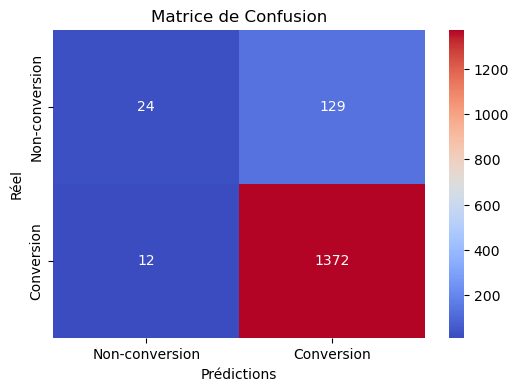

In [107]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Visualiser la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=['Non-conversion', 'Conversion'], yticklabels=['Non-conversion', 'Conversion'])
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de Confusion")
plt.show()


### Interprétation des résultats de la matrice de confusion 

**True Positives (Conversion prédite correctement) :** Valeur : 1 372 Cela représente les cas où le modèle a correctement prédit la conversion. Ce chiffre montre que le modèle est capable de bien identifier les clients qui vont répondre positivement à la campagne marketing.

**False Positives (Conversion prédite à tort) :** Valeur : 129 Ce sont les cas où le modèle a prédit une conversion, mais le client n'a en réalité pas converti. Cela signifie que le modèle, bien que performant, a tendance à parfois surévaluer la probabilité de conversion.

**True Negatives (Non-conversion prédite correctement) :** Valeur : 24 Ce chiffre montre le nombre de cas où le modèle a correctement prédit la non-conversion. C’est un faible nombre comparé aux conversions, ce qui peut indiquer un déséquilibre des classes dans les données, c'est-à-dire que les cas de conversion sont majoritaires dans le dataset.

**False Negatives (Non-conversion prédite à tort) :** Valeur : 12 Ces cas représentent les clients qui ont effectivement converti mais que le modèle a prédits comme non-conversion. Ce type d’erreur est important à minimiser, car il concerne des clients potentiels que le modèle ne parvient pas à identifier.

### Analyse des résultats du Rapport de classification:

In [111]:
# Afficher le rapport de classification
print("Régression Logistique - Rapport de classification :")
print(classification_report(y_test, y_pred_log_reg))

Régression Logistique - Rapport de classification :
              precision    recall  f1-score   support

         0.0       0.67      0.16      0.25       153
         1.0       0.91      0.99      0.95      1384

    accuracy                           0.91      1537
   macro avg       0.79      0.57      0.60      1537
weighted avg       0.89      0.91      0.88      1537



<p style="font-size:16px;">Classe 1 (Conversion) :

**Précision (0.91) :** La précision pour la classe de conversion(1) est très élevée, ce qui signifie que 91 % des prédictions de conversion sont correctes. Le modèle identifie bien les clients susceptibles de convertir.

**Rappel (0.99) :** Avec un rappel de 99 %, le modèle capture presque tous les cas de conversion dans les données. C'est excellent pour une campagne marketing, car cela réduit les chances de manquer des clients potentiellement intéressés.

**F1-Score (0.95) :** Cet indicateur est élevé (95%), combinant précision et rappel, ce qui montre une bonne performance du modèle pour la classe de conversion.

<p style="font-size:16px;">Classe 0 (Non-conversion) :

**Précision (0.67) :** La précision pour les non-conversions est plus faible (67 %) un peu plus de la moitié, signifiant que le modèle fait des erreurs en prédisant les clients non-convertis. Ce taux peut causer des coûts supplémentaires si des clients qui n’étaient pas intéressés sont mal identifiés comme "non-convertis".

**Rappel (0.16) :** Le rappel pour les non-conversions est également faible (16 %), ce qui veut dire que le modèle manque plusieurs clients qui n’auraient pas converti.

**F1-Score (0.25) :** Le F1-score est bas pour cette classe, montrant que le modèle a plus de difficultés à bien prédire les non-conversions. 

<p style="font-size:16px;">Mesures globales :

**Accuracy (0.91) :** Le modèle a une précision globale de 91 %, indiquant qu'il est performant en général, mais surtout pour les conversions.

**Macro avg et Weighted avg :** Les moyennes pondérées de précision, rappel et F1-score montrent que le modèle est biaisé en faveur des conversions, ce qui est acceptable dans notre cas puisque la priorité est d'identifier les clients convertis potentiels.

**Conclusion en lien avec le projet**

Pour notre projet, l'objectif est d'identifier les clients susceptibles de convertir dans une campagne marketing. Les résultats montrent que notre modèle est performant pour repérer ces clients (classe 1), ce qui est précieux pour optimiser les ressources marketing. Le modèle pourrait encore être amélioré pour réduire les faux négatifs dans la classe des non-conversions, mais l'orientation vers la classe de conversion est cohérente avec les besoins du projet.

Ces résultats nous permettent donc de répondre en partie à notre problématique en identifiant efficacement les facteurs influençant la conversion, tout en prédéfinissant les clients à cibler pour des campagnes spécifiques.

### Interprétation de la courbe ROC

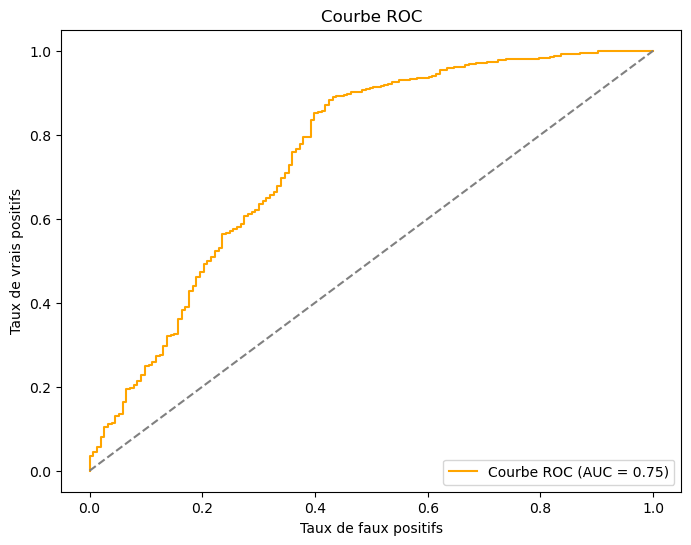

In [115]:
# Obtenir les probabilités de prédiction pour la classe positive
y_proba = log_reg_model.predict_proba(X_test_scaled)[:, 1]

# Calculer la courbe ROC et l'AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Visualiser la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="orange", label=f"Courbe ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()


<p style="font-size:16px;">La courbe ROC (Receiver Operating Characteristic) est un graphique qui montre la performance du modèle pour différentes valeurs de seuils de classification. Elle illustre la capacité du modèle à distinguer entre les classes "Conversion" et "Non-conversion".

<p style="font-size:16px;">Axe des Y (Taux de vrais positifs) : C’est le taux de détection, aussi appelé sensibilité ou rappel. Il indique le pourcentage des cas positifs réels (conversions) que le modèle a bien prédits comme positifs.

<p style="font-size:16px;">Axe des X (Taux de faux positifs) : C’est le taux de fausses alertes. Il montre le pourcentage de cas négatifs (non-conversions) qui ont été incorrectement prédits comme positifs.

<p style="font-size:16px;">La courbe ROC en elle-même : Plus la courbe est proche du coin supérieur gauche, meilleure est la capacité du modèle à distinguer entre les classes. Dans notre cas, la courbe est assez proche du coin supérieur gauche, ce qui indique une bonne performance de notre modèle.

<p style="font-size:16px;">AUC (Area Under the Curve) : L’aire sous la courbe ROC (AUC) est une mesure globale de la performance du modèle. Dans ce cas, AUC = 0,75, ce qui signifie que notre modèle a une capacité de classification bonne. Plus l’AUC est proche de 1, plus le modèle est performant. Ici, un score de 0,75 montre que notre modèle est capable de bien différencier les clients qui ont une probabilité de conversion de ceux qui n'en ont pas.

**<p style="font-size:16px;">Contribution aux objectifs du projet**

<p style="font-size:16px;">Dans le cadre du projet, la courbe ROC et l’AUC nous montrent que notre modèle de régression logistique est bien adapté pour prédire la probabilité de conversion des clients dans une campagne marketing. Grâce à cette analyse, nous savons que le modèle est performant et pourrait être utilisé pour identifier les clients les plus susceptibles de répondre positivement à une campagne.

## Creation de la fonction predict_purchase() 
<p style="font-size:16px;">pour faciliter l'utilisation du modèle de régression logistique dans des situations pratiques. Cette fonction prendra les caractéristiques d'un client en entrée et retournera une prédiction pour savoir si le client est susceptible de convertir (répondre positivement à la campagne).

In [119]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Appliquer le même scaler


model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

In [121]:
features = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 
                      62.0, 112675.0, 3500, 0.244055, 0.084260, 48.0, 
                      1.762482, 8.809063, 70.0, 1.0, 3.0, 8.0, 3721.0]])


# Je fais liste des noms de colonnes utilisés pendant l'entraînement de ton modèle 
feature_names = [
    "Sexe_Male", "CanalCampagne_PPC", "CanalCampagne_Referral", "CanalCampagne_SEO", 
    "CanalCampagne_Social Media", "TypeCampagne_Consideration", "TypeCampagne_Conversion", 
    "TypeCampagne_Retention", "Âge", "Revenu", "DépensesPublicitaires", "TauxDeClics", 
    "TauxDeConversion", "VisitesSiteWeb", "PagesParVisite", "TempsSurSite", 
    "PartagesSociaux", "OuverturesEmail", "ClicsEmail", "AchatsPrécédents", "PointsFidélité"
]

# Je converti les caractéristiques en DataFrame avec des noms de colonnes
features_df = pd.DataFrame(features, columns=feature_names)

# On normalise les données si un scaler a été utilisé
if scaler:
    features_df = scaler.transform(features_df)

#je lance la prédiction : Savoir si l'individu dont les caracteristiques sont dans features va être converti
prediction = model.predict(features_df)
probabilite = model.predict_proba(features_df)

# Enfin, j'affiche les résultats
print(f"Prédiction : {prediction[0]}")  # La classe prédite
print(f"Probabilités des classes : {probabilite}")  # Les probabilités associées


Prédiction : 1.0
Probabilités des classes : [[0.46665156 0.53334844]]


<p style="font-size:16px;">La prédiction indique que cet individu a une probabilité de 53,33% de se convertir en client (classe 1) et une probabilité de 46,67% de ne pas se convertir (classe 0).

In [124]:
features = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 
                      30.0, 175.0, 350, 0.2055, 0.0860, 8.0, 
                      1.7, 8.63, 10.0, 1.0, 1.0, 1.0, 100.0]])


# Je fais liste des noms de colonnes utilisés pendant l'entraînement de ton modèle 
feature_names = [
    "Sexe_Male", "CanalCampagne_PPC", "CanalCampagne_Referral", "CanalCampagne_SEO", 
    "CanalCampagne_Social Media", "TypeCampagne_Consideration", "TypeCampagne_Conversion", 
    "TypeCampagne_Retention", "Âge", "Revenu", "DépensesPublicitaires", "TauxDeClics", 
    "TauxDeConversion", "VisitesSiteWeb", "PagesParVisite", "TempsSurSite", 
    "PartagesSociaux", "OuverturesEmail", "ClicsEmail", "AchatsPrécédents", "PointsFidélité"
]

# Je converti les caractéristiques en DataFrame avec des noms de colonnes
features_df = pd.DataFrame(features, columns=feature_names)

# On normalise les données si un scaler a été utilisé
if scaler:
    features_df = scaler.transform(features_df)

# je lance la prédiction : Savoir si l'individu dont les caracteristiques sont dans features va être converti
prediction = model.predict(features_df)
probabilite = model.predict_proba(features_df)

# Enfin, j'affiche les résultats
print(f"Prédiction : {prediction[0]}")  # La classe prédite
print(f"Probabilités des classes : {probabilite}")  # Les probabilités associées


Prédiction : 0.0
Probabilités des classes : [[0.95749576 0.04250424]]


<p style="font-size:16px;">La prédiction indique que cet individu a une probabilité de 0,04% de se convertir en client (classe 1) et une probabilité de 0,95% de ne pas se convertir (classe 0).

## Conclusion du modèle predictive 

<p style="font-size:16px;">Le modèle de régression logistique a permis de répondre efficacement à la problématique du projet en identifiant les principaux facteurs de conversion et en fournissant des prédictions fiables pour les clients les plus susceptibles de convertir. Avec une précision de 90,83 %, ce modèle est un outil précieux pour optimiser les campagnes marketing de l’entreprise tout en réduisant les coûts. Cependant, une amélioration des prédictions pour la classe 0 serait souhaitable pour maximiser l’impact global du modèle.

## Afficher les coefficients des features et visualiser leur importance :

Top 10 des features les plus importantes :
                    Feature  Importance
18               ClicsEmail    0.506304
15             TempsSurSite    0.484178
10    DépensesPublicitaires    0.481476
11              TauxDeClics    0.477916
17          OuverturesEmail    0.471859
6   TypeCampagne_Conversion    0.470751
12         TauxDeConversion    0.418308
19         AchatsPrécédents    0.404627
14           PagesParVisite    0.391550
20           PointsFidélité    0.374972


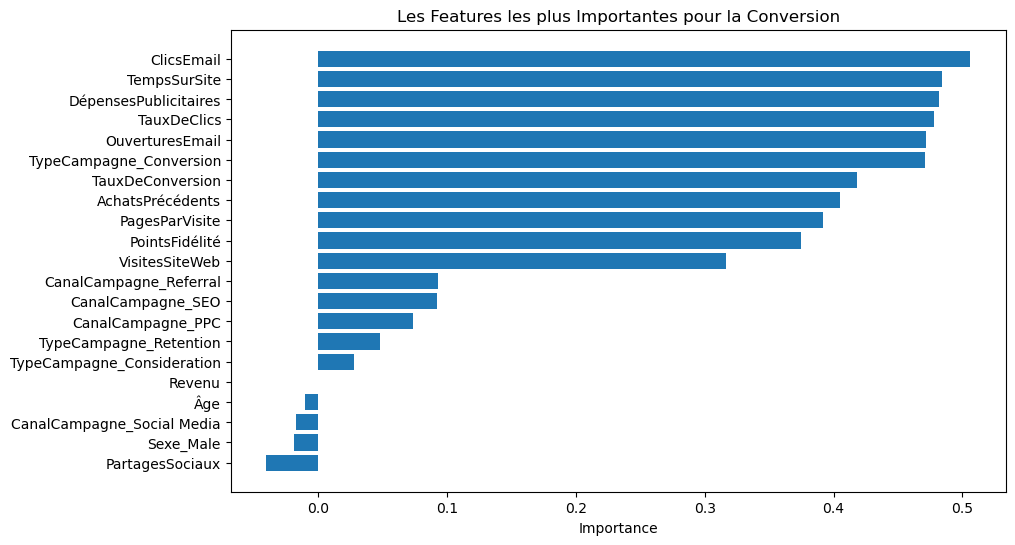

In [129]:
# Étape 1 : Récupérer les coefficients du modèle LogisticRegression
# Les coefficients indiquent l'importance des features pour la prédiction
importances = log_reg_model.coef_[0]  # Les coefficients des features (tableau 1D)
feature_names = X.columns  # Les noms des colonnes utilisées dans l'entraînement du modèle

# Étape 2 : Créer un DataFrame pour associer chaque feature à son coefficient
# Cela permet de mieux visualiser et trier les informations
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Étape 3 : Trier les features par ordre décroissant d'importance
# Les features les plus influentes apparaîtront en premier
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Étape 4 : Afficher les 10 principales features dans la console
# Ceci permet d'avoir une vue rapide des variables les plus importantes
print("Top 10 des features les plus importantes :")
print(importance_df.head(10))

# Étape 5 : Visualiser l'importance des features
# Le graphique montrera les 20 features les plus influentes
plt.figure(figsize=(10, 6))  # Définir la taille du graphique
plt.barh(importance_df['Feature'][:21], importance_df['Importance'][:21])  # Graphique en barres horizontales
plt.gca().invert_yaxis()  # Inverser l'axe des Y pour que la feature la plus importante soit en haut
plt.xlabel("Importance")  # Ajouter une étiquette à l'axe X
plt.title("Les Features les plus Importantes pour la Conversion")  # Ajouter un titre au graphique
plt.show()  # Afficher le graphique



# Interprétation des résultats et conclusion pour le projet final

<p style="font-size:16px;">Résultats obtenus :

<p style="font-size:16px;">Top des caractéristiques les plus importantes :

**<p style="font-size:16px;">ClicsEmail :** C'est la caractéristique la plus influente dans la conversion des clients. Cela suggère que le nombre de clics sur les emails de marketing est un indicateur clé de l'engagement client.

**<p style="font-size:16px;">TempsSurSite :**  Plus un client passe de temps sur le site web, plus il est probable qu'il se convertisse. Cela indique qu’une expérience utilisateur engageante est essentielle pour encourager les conversions.

**<p style="font-size:16px;">DépensesPublicitaires :** Le budget publicitaire attribué à un client ou à une campagne joue un rôle crucial. Une meilleure allocation des dépenses peut améliorer les taux de conversion.

**<p style="font-size:16px;">TauxDeClics:** Le pourcentage de clics générés par les publicités montre également une forte corrélation avec la conversion. Cela suggère que la pertinence des publicités est clé.

**<p style="font-size:16px;">OuverturesEmail et TypeCampagne_Conversion :** Ces variables montrent l'importance des interactions directes des clients avec les emails et les types de campagnes axées spécifiquement sur las capagnes de conversion.


**<p style="font-size:16px;">Les caractéristiques comme PointsFidélité ou PagesParVisite :** Ces métriques indiquent l’engagement global des clients (navigation sur plusieurs pages) et leur fidélité accumulée au fil du temps.

<p style="font-size:16px;">Les caractéristiques liées aux canaux spécifiques (SEO, PPC, Social Media) ont une influence moindre dans ce contexte particulier, ce qui peut refléter une moindre efficacité ou un rôle plus indirect.


**<p style="font-size:16px;">Lien avec la problématique :**

<p style="font-size:16px;">"Quels sont les facteurs qui influencent le plus la conversion dans une campagne marketing ?" Ces résultats répondent clairement à cette question en identifiant les éléments spécifiques qui contribuent le plus aux conversions, en particulier les interactions directes avec les emails et le comportement sur le site.

**<p style="font-size:16px;">Implications stratégiques pour l'entreprise :**

<p style="font-size:16px;">Prioriser les emails marketing :

<p style="font-size:16px;">Mettre l'accent sur l'amélioration du contenu des emails pour encourager les clics et les ouvertures.

<p style="font-size:16px;">Tester différents objets d'email et appels à l'action pour optimiser les taux de clics.

<p style="font-size:16px;">Optimiser le site web :

<p style="font-size:16px;">Fournir un contenu engageant qui maintient les visiteurs sur le site plus longtemps.
Faciliter la navigation et simplifier le processus d'achat pour augmenter les conversions.

<p style="font-size:16px;">Allouer les ressources publicitaires :

<p style="font-size:16px;">Augmenter les budgets publicitaires pour les campagnes axées sur la conversion, car elles ont montré leur efficacité.

<p style="font-size:16px;">Réévaluer l'efficacité des canaux comme Social Media et PPC pour ajuster les dépenses publicitaires.

<p style="font-size:16px;">Programme de fidélisation :

<p style="font-size:16px;">Renforcer l'importance des programmes de fidélité pour encourager les conversions répétées.

**<p style="font-size:16px;">Conclusions en lien avec les objectifs du projet**

<p style="font-size:16px;">Identification des facteurs clés de conversion

<p style="font-size:16px;">Les résultats montrent que les campagnes doivent se concentrer sur l'optimisation des emails (ciblage et contenu), sur une expérience utilisateur engageante (temps passé sur le site, pages visitées), et sur une meilleure utilisation du budget publicitaire.

<p style="font-size:16px;">Les métriques d'engagement directes (clics et ouvertures d'emails, taux de clics) sont plus déterminantes que les données démographiques ou les types de campagnes.

<p style="font-size:16px;">Segmentation et personnalisation

<p style="font-size:16px;">Les résultats appuient l'idée que la segmentation basée sur l'engagement (clics, visites, temps passé) est plus efficace que celle basée sur des critères démographiques ou sociaux.
Les campagnes axées sur les clients déjà engagés ou ceux ayant des interactions fréquentes avec les emails ont un potentiel de conversion plus élevé.

<p style="font-size:16px;">Optimisation des coûts

<p style="font-size:16px;">En identifiant les caractéristiques importantes, les entreprises peuvent concentrer leurs efforts publicitaires sur les clients ayant un fort potentiel, ce qui réduit les coûts d'acquisition et maximise l'efficacité.

<p style="font-size:16px;">Impact pour les campagnes marketing

<p style="font-size:16px;">Amélioration des taux de conversion : En utilisant ces insights, les entreprises peuvent concevoir des campagnes plus ciblées qui exploitent au mieux les leviers d’engagement client identifiés.

<p style="font-size:16px;">Optimisation de la répartition des ressources : Les efforts marketing peuvent être concentrés sur les canaux et les clients avec les meilleures chances de conversion.

<p style="font-size:16px;">Création d’une stratégie basée sur les données : En s'appuyant sur des métriques fiables, les équipes marketing peuvent prendre des décisions éclairées pour améliorer continuellement leurs résultats

**<p style="font-size:16px;">Conclusion :**

<p style="font-size:16px;">l’utilisation de modèles prédictifs pour analyser et optimiser les campagnes marketing est un levier stratégique puissant maximiser l'efficacité des campagnes. Grâce à ce modèle, l'entreprise peut concentrer ses ressources sur les clients et les canaux les plus prometteurs, cherchant à maximiser leur ROI (retour sur investissement), réduisant ainsi les coûts et augmentant le taux de conversion global.

In [138]:
#Exportez le DataFrame final dans un fichier CSV après avoir effectué toutes les transformations demandées
data.to_csv('data_campagnes.csv',index=False)